# CPI price trends 

This is code for a python workshop with LSE undergraduate economics students to explore price ridigity and price trends using UK CPI data.

__The brief__

You are an economics consultant and have been approached by an ecommerce business who are looking to expand the products available on their platform. They would like you to provide an analysis into some popular items for UK consumers and their corresponding price trends. As an online site they might also want to know how this could inform the company's own pricing decisions. 

# Motivation 

The source of price rigidity is a foundational question in macroeconomics, and one which improvments in data is consistently shifting our understanding of. This data has been provided by Richard Davies (LSE), you can read more about how the dataset was constructed and the corresponding draft paper on his website [here.](https://richarddavies.io/research/the-uk-consumer-basket) 

<img src="london, alcohol prices.png" alt="london, alcohol prices" width="400"/>


### The data 
The price data come from monthly records of prices known as ‘price quotes’ that are recorded by the Office for National Statistics (ONS). The price quotes files contain information on the item sold, its location, the shop and shop type (the size of the establishment) it is sold in, and whether it was offered at a sale or regular price. In the past year the ONS have also begun collecting prices from online retailers. The final raw data has over 32m observations. The dataset you will be using is not the original ONS price quotes data** but a smaller, cleaner sample with fewer basket items are available to download from [here.](https://www.dropbox.com/s/w87w1o5dy0et2o0/everpresent10items%20.csv?dl=0) 

** ONS datasets from 1996 - present are available to explore [here.](https://www.ons.gov.uk/economy/inflationandpriceindices/datasets/consumerpriceindicescpiandretailpricesindexrpiitemindicesandpricequotes)


### Related literature 
For the purposes of the weekend, we suggest only skimming one or two of the papers. Given you are time constrained, you should not spend a lot of your time on this. 

Klenow P and Malin B (2010), “Microeconomic Evidence on Price Setting”, prepared for the Handbook of Monetary Economics. Available [here](https://www.nber.org/papers/w15826)

Kehoe, Patrick and Virgiliu Midrigan (2014) “Prices are Sticky After All," Journal of Monetary Economics. Available [here](https://www.sciencedirect.com/science/article/pii/S0304393214001809)

Nakamura, Emi and Jón Steinsson (2013), “Lost in Transit: Product Replacement Bias and Pricing to Market”, American Economic Review 2012, 102(7): 3277–3316. Available [here](https://www.aeaweb.org/articles?id=10.1257/aer.102.7.3277)


# Import relevant packages
Students should be familiar with most of these packages, you will use the usual pandas, numpy and mapplotlib - no additions needed (seaborn is optional to create more customised charts).

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import ggplot

# Import data
This will be a more discursive task. There is no correct answer. 

__TIP__ You should however explain what the CPI basket is and understand how basket items are selected and deselected. 


In [260]:
df1= pd.read_csv('everpresent10items .csv') # I stopped using hte 10% sample here, as the charts look slightly odd 

df1.head(n=2)

,date,year,month,item,description,price,region
0,1,1996,1,206,CHOCOLATE,0.30,London
1,1,1996,1,206,CHOCOLATE,0.27,East Midlands


# Inspect the data
Once you import the data, you want to look at what the data is telling us and how we can use it.

Need to get to know the data you're using before doing any analysis.

It is also good practise to check the data is clean so you can iron out issues before getting stuck part-way through. 

__TIP__: Note down some of the interesting stats from here - this will be helpful when giving your presentation.

In [261]:
df1.shape

(601692, 7)

In [262]:
df1.describe()

,date,year,month,item,price
count,601692.000000,601692.000000,601692.000000,601692.000000,601692.000000
mean,140.045088,2007.131418,6.468075,580.713526,11.982095
std,83.090642,6.925653,3.477121,272.249871,32.108948
min,1.000000,1996.000000,1.000000,206.000000,0.200000
25%,66.000000,2001.000000,3.000000,390.000000,1.150000
50%,143.000000,2007.000000,6.000000,443.000000,2.490000
75%,212.000000,2013.000000,10.000000,789.000000,8.000000
max,280.000000,2019.000000,12.000000,1146.000000,1625.000000


In [263]:
df1.count()

date           601692
year           601692
month          601692
item           601692
description    601692
price          601692
region         601692
dtype: int64

In [264]:
df1.tail(n=2)

,date,year,month,item,description,price,region
601690,280,2019,4,1146,MINICAB,6.4,South West
601691,280,2019,4,1146,MINICAB,4.5,North


You now want to find out what the 10 items are that you have in this dataset 

In [265]:
df1.description.unique()

array(['CHOCOLATE', 'COFFEE', 'SANDWICH', 'CRISPS', 'VODKA', 'CIGARETTES',
       'MENS JACKET/COAT', "WOMEN'S JUMPER", 'MASCARA', 'MINICAB'],
      dtype=object)

Do the same for regions. 

__Q__: Is this data grouped by the 4 nations or by NUTS1 regions?

In [266]:
df1.region.unique()

array(['London', 'East Midlands', 'Scotland', 'Yorkshire & Humber',
       'South East', 'South West', 'Northern Ireland', 'North',
       'East Anglia', 'North West', 'Wales', 'West Midlands',
       'Catalogue collections'], dtype=object)

### (check the data is clean)
Next, we check that there are no zero prices, and some other tests for problematic data. 

Since the data is pre-cleaned, the results to this should all be negative, but it is good practise to assess your datasets! 

In [267]:
df1[df1.price ==0]

,date,year,month,item,description,price,region


Now we check if there are any empty cells

In [268]:
pd.isnull(df1)

,date,year,month,item,description,price,region
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
601687,False,False,False,False,False,False,False
601688,False,False,False,False,False,False,False
601689,False,False,False,False,False,False,False
601690,False,False,False,False,False,False,False


So far it looks likes the data is clean and we know what were are using. Let's make a start on our analysis.

In [269]:
choc = df1[df1.description =='CHOCOLATE']

In [270]:
choc.head(n=2)

,date,year,month,item,description,price,region
0,1,1996,1,206,CHOCOLATE,0.30,London
1,1,1996,1,206,CHOCOLATE,0.27,East Midlands


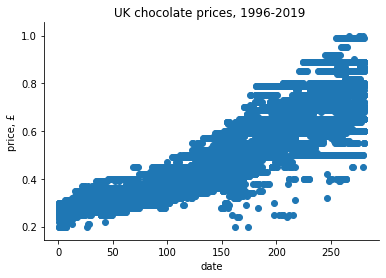

In [271]:
plt.scatter(choc['date'].values, choc['price'].values)

plt.title('UK chocolate prices, 1996-2019 ')
plt.xlabel('date') # Set x-axis label
plt.ylabel('price, £') # Set y-axis label
sns.despine() #neater layout, not needed if you haven't imported/installed the package 'seaborn'
plt.show()

Clearly, this doesn't look great and doesn't tell us much information.

We can create percentiles to have a broader look at the price trends of our items. 

# Creating percentiles 

We want to create percentiles p10 all the way to p90 for each of our ten items. 

Here we begin just by looking at the max, min and mea prices for chocolate

In [272]:
# again we are only using chocolate data here 
chocagg = df1[df1['description'] == 'CHOCOLATE'].groupby('date').agg(
    # Get max of the price column for each group
    max_price=('price', max),
    # Get min of the price column for each group
    min_price=('price', min),
    # Get mean of the price column for each group
    mean_price=('price', np.mean),
    # Get sum of the price column for each group
    total_price=('price', sum)).reset_index() 

# this was a helpful site: http://www.pybloggers.com/2018/12/python-pandas-groupby-tutorial/

In [273]:
chocagg.head(n=5)

,date,max_price,min_price,mean_price,total_price
0,1,0.3,0.2,0.263116,52.36
1,2,0.3,0.2,0.264677,49.23
2,3,0.3,0.2,0.265185,50.12
3,4,0.3,0.2,0.265833,51.04
4,5,0.3,0.2,0.267500,50.29


In [274]:
chocagg.info

<bound method DataFrame.info of      date  max_price  min_price  mean_price  total_price
0       1       0.30       0.20    0.263116        52.36
1       2       0.30       0.20    0.264677        49.23
2       3       0.30       0.20    0.265185        50.12
3       4       0.30       0.20    0.265833        51.04
4       5       0.30       0.20    0.267500        50.29
..    ...        ...        ...         ...          ...
275   276       1.00       0.50    0.717615        93.29
276   277       1.00       0.50    0.713817        93.51
277   278       0.99       0.50    0.719760        89.97
278   279       1.00       0.45    0.724960        90.62
279   280       0.99       0.55    0.721591        95.25

[280 rows x 5 columns]>

In [275]:
chocagg.dtypes

date             int64
max_price      float64
min_price      float64
mean_price     float64
total_price    float64
dtype: object

In [276]:
type('date')

str

In [277]:
chocagg.describe()

,date,max_price,min_price,mean_price,total_price
count,280.000000,280.000000,280.000000,280.000000,280.000000
mean,140.500000,0.618500,0.341321,0.465408,59.749571
std,80.973247,0.219587,0.094827,0.151424,19.578092
min,1.000000,0.300000,0.200000,0.263116,15.660000
25%,70.750000,0.415000,0.260000,0.320798,41.850000
50%,140.500000,0.570000,0.320000,0.422874,53.830000
75%,210.250000,0.800000,0.400000,0.630935,81.010000
max,280.000000,1.000000,0.560000,0.724960,95.250000


In [278]:
chocagg[chocagg.date ==0]

,date,max_price,min_price,mean_price,total_price


------

Let's create a quick visualisation so that we can see if out stats look sensible. 

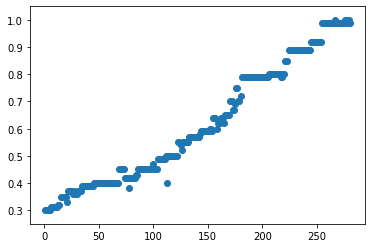

In [279]:
plt.scatter(chocagg['date'], chocagg['max_price'])
plt.show()

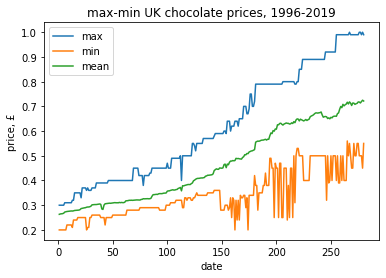

In [280]:
# multiple line plot
# example templates: https://www.kaggle.com/andyxie/matplotlib-plot-multiple-lines

plt.plot(chocagg['date'], chocagg['max_price'], '-', label='max')
plt.plot(chocagg['date'], chocagg['min_price'], '-', label='min') # could use '--' for dashed lined 
plt.plot(chocagg['date'], chocagg['mean_price'], '-', label='mean') # could use '-.' for dot-dashed lined 
plt.legend(loc="upper left")
plt.title('max-min UK chocolate prices, 1996-2019')
plt.xlabel('date') # Set x-axis label
plt.ylabel('price, £') # Set y-axis label
plt.show()

# Take another look at the percentile charts 

Note: here we filter columns relating to chocolate and then only pick the date and percentile columns. 

### creating percentiles for chocolate

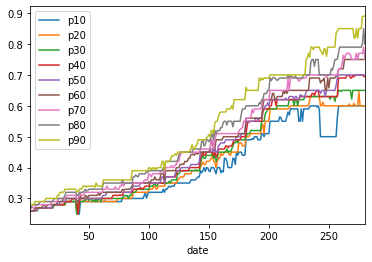

In [281]:
(
    choc
    .groupby("date")
    ["price"]
    .apply(pd.Series.quantile, [0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8, 0.9])
    .unstack()
    .rename(columns={0.1: "p10", 0.2:"p20", 0.3: "p30",0.4: "p40",0.5: "p50",0.6:"p60",0.7:"p70",0.8:"p80", 0.9: "p90"})
    .plot()
)


In [289]:
choc_perc = (choc
    .groupby("date")
    ["price"]
    .apply(pd.Series.quantile, [0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8, 0.9])
    .unstack()
    .rename(columns={0.1: "p10", 0.2:"p20", 0.3: "p30",0.4: "p40",0.5: "p50",0.6:"p60",0.7:"p70",0.8:"p80", 0.9: "p90"})
        ).reset_index() 

choc_perc

,date,p10,p20,p30,p40,p50,p60,p70,p80,p90
0,1,0.26,0.26,0.26,0.260,0.26,0.26,0.266,0.27,0.28
1,2,0.26,0.26,0.26,0.260,0.26,0.26,0.270,0.27,0.28
2,3,0.26,0.26,0.26,0.260,0.26,0.26,0.270,0.28,0.28
3,4,0.26,0.26,0.26,0.260,0.26,0.26,0.270,0.28,0.28
4,5,0.26,0.26,0.26,0.260,0.26,0.27,0.270,0.28,0.29
...,...,...,...,...,...,...,...,...,...,...
275,276,0.60,0.60,0.65,0.700,0.70,0.75,0.770,0.79,0.85
276,277,0.60,0.60,0.65,0.700,0.70,0.75,0.770,0.79,0.85
277,278,0.60,0.60,0.65,0.700,0.70,0.75,0.770,0.80,0.89
278,279,0.60,0.60,0.65,0.696,0.70,0.75,0.790,0.85,0.89


In [290]:
choc_perc.dtypes

date      int64
p10     float64
p20     float64
p30     float64
p40     float64
p50     float64
p60     float64
p70     float64
p80     float64
p90     float64
dtype: object

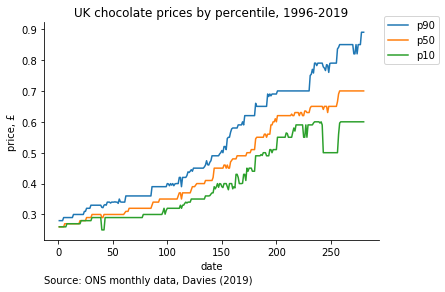

In [312]:
plt.plot(choc_perc['date'], choc_perc['p90'], '-', label='p90') # could use '-.' for dot-dashed lined 
plt.plot(choc_perc['date'], choc_perc['p50'], '-', label='p50') # could use '--' for dashed lined 
plt.plot(choc_perc['date'], choc_perc['p10'], '-', label='p10')
#plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(1, 1.05))
plt.title('UK chocolate prices by percentile, 1996-2019')
plt.xlabel('date') # Set x-axis label
plt.ylabel('price, £') # Set y-axis label
plt.annotate('Source: ONS monthly data, Davies (2019)', 
             (0,0), (0, -35), xycoords='axes fraction', textcoords='offset points', va='top')
sns.despine() 
plt.show()

__Q__: What does this tell us about chocolate prices over time? What do you notice about the gap between the p90 and p10 over time?

# Swathe Charts 

This is a neater way to display the data. Again using it for chocolate.

You can also use the area chart commands here!
 

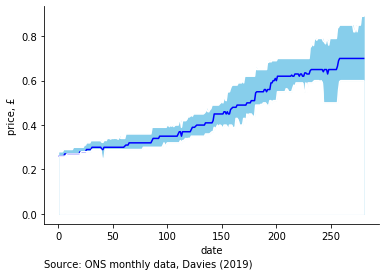

In [327]:
# Creating nice looking charts is quite fiddly! 

plt.fill_between( choc_perc['date'], choc_perc['p90'], color="skyblue")
#plt.fill_between( choc_perc['date'], choc_perc['p60'], color="blue")
#plt.fill_between( choc_perc['date'], choc_perc['p40'], color="skyblue")
plt.fill_between( choc_perc['date'], choc_perc['p10'], color="white", alpha=1)

plt.plot(choc_perc['date'], choc_perc['p90'], color="white")
plt.plot(choc_perc['date'], choc_perc['p50'], '-', color="blue")
plt.plot(choc_perc['date'], choc_perc['p10'], color="white")

#plt.legend(bbox_to_anchor=(1, 1.05))
plt.xlabel('date') # Set x-axis label
plt.ylabel('price, £') # Set y-axis label
plt.annotate('Source: ONS monthly data, Davies (2019)', 
             (0,0), (0, -35), xycoords='axes fraction', textcoords='offset points', va='top')
sns.despine() 

plt.show()


# Extension 

* You can repeat this for the other 9 items in the our original dataframe.

* You could also merge in the monthly CPI inflation rate, and calculate the inflation rate for a specific item. 
    * __TIP__: The dates for the monthly data must match our simplified 'dates' 1-280. you should create a column in the inflation rate dataframe and then merge. 

# Extended extension 

If you have time, you can go back and download the csv sample dataset for all basket items. 
These are ~172 items which have been present throughout 1996 - 2019. You can do a similar exercise for a select number of items, or create your own consumer 'basket'.